In [1]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

file="host"
traindir="datasets/binary_train"
testdir="datasets/binary_test"


Using TensorFlow backend.


In [2]:
# load the dataset
traindata = pd.read_csv(f"{traindir}/processed/{file}.csv")
testdata = pd.read_csv(f"{testdir}/processed/{file}.csv")
n=len(traindata.count())
n

11

In [3]:
# split into input (X) and output (y) variables
X = traindata.iloc[:,0:n-1]
y = traindata.iloc[:,n-1]
X_test = testdata.iloc[:,0:n-1]
y_test = testdata.iloc[:,n-1]

In [4]:
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=n-1, activation='relu'))
model.add(Dense(36, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:

# compile the keras model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:

# fit the keras model on the dataset
history = model.fit(X, y, epochs=100, batch_size=5000,validation_split=0.2)


Train on 100778 samples, validate on 25195 samples
Epoch 1/100
100778/100778 [==============================] - 0s 4us/step - loss: 0.4669 - accuracy: 0.8374 - val_loss: 0.3559 - val_accuracy: 0.8498
Epoch 2/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3335 - accuracy: 0.8581 - val_loss: 0.3156 - val_accuracy: 0.8627
Epoch 3/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3136 - accuracy: 0.8626 - val_loss: 0.3058 - val_accuracy: 0.8654
Epoch 4/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.3050 - accuracy: 0.8658 - val_loss: 0.2953 - val_accuracy: 0.8720
Epoch 5/100
100778/100778 [==============================] - ETA: 0s - loss: 0.2962 - accuracy: 0.87 - 0s 3us/step - loss: 0.2948 - accuracy: 0.8710 - val_loss: 0.2851 - val_accuracy: 0.8766
Epoch 6/100
100778/100778 [==============================] - 0s 3us/step - loss: 0.2837 - accuracy: 0.8773 - val_loss: 0.2852 - val_accuracy: 0.8885
Epoch 7/100
1

100778/100778 [==============================] - 0s 2us/step - loss: 0.1190 - accuracy: 0.9547 - val_loss: 0.1157 - val_accuracy: 0.9569
Epoch 56/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.1186 - accuracy: 0.9546 - val_loss: 0.1227 - val_accuracy: 0.9500
Epoch 57/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.1218 - accuracy: 0.9533 - val_loss: 0.1190 - val_accuracy: 0.9557
Epoch 58/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.1174 - accuracy: 0.9555 - val_loss: 0.1148 - val_accuracy: 0.9582
Epoch 59/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.1186 - accuracy: 0.9549 - val_loss: 0.1203 - val_accuracy: 0.9537
Epoch 60/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.1221 - accuracy: 0.9524 - val_loss: 0.1160 - val_accuracy: 0.9567
Epoch 61/100
100778/100778 [==============================] - 0s 2us/step - loss: 0.1177 - accuracy: 0.9550 - val

In [7]:

# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

22542/22542 [==============================] - 0s 19us/step
Accuracy: 76.07


In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
prediction=model.predict_classes(X_test)
m=confusion_matrix(y_test,prediction)
m

array([[9193,  517],
       [4877, 7955]], dtype=int64)

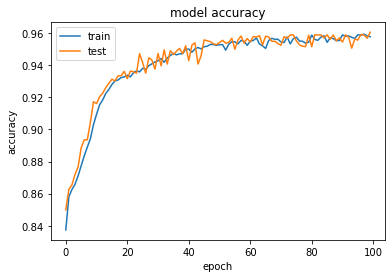

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:

# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]
print(rounded[1] )

0.0
